## **EDA**

In [6]:
import sys
import pandas as pd

sys.path.append("../../src/preprocessing")
sys.path.append("../../src/visualization")


In [7]:
from data_cleaner import data_cleaner

data_cleaner("../../data/raw/btc_daily_ohlcv.csv", "../../data/processed/btc_daily_cleaned.csv")

--- Starting Data Cleaning ---
Input Path: ../../data/raw/btc_daily_ohlcv.csv
Output Path: ../../data/processed/btc_daily_cleaned.csv
Handling missing values using forward fill (ffill) and backward fill (bfill)...
Dropped columns: ['Dividends', 'Stock Splits']
Data cleaning completed. Saved to '../../data/processed/btc_daily_cleaned.csv'.
Cleaned DataFrame shape: (4017, 5) (Original shape was: (4017, 7))


/home/valid-result/Documents/GitHub/Bitcoin-Daily-Navigator/Bitcoin-Daily-Navigator/notebooks/visualization/../../src/preprocessing/data_cleaner.py:56: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
/home/valid-result/Documents/GitHub/Bitcoin-Daily-Navigator/Bitcoin-Daily-Navigator/notebooks/visualization/../../src/preprocessing/data_cleaner.py:57: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True) # Handles NaNs at the very beginning if ffill couldn't


,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2025-09-11 00:00:00+00:00,113961.429688,115522.546875,113453.835938,115507.539062,45685065332
2025-09-12 00:00:00+00:00,115507.789062,116769.382812,114794.484375,116101.578125,54785725894
2025-09-13 00:00:00+00:00,116093.562500,116334.632812,115248.273438,115950.507812,34549454947


In [8]:
df_cleaned = pd.read_csv("../../data/processed/btc_daily_cleaned.csv")

df_cleaned.set_index("Date")


,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2025-09-11 00:00:00+00:00,113961.429688,115522.546875,113453.835938,115507.539062,45685065332
2025-09-12 00:00:00+00:00,115507.789062,116769.382812,114794.484375,116101.578125,54785725894
2025-09-13 00:00:00+00:00,116093.562500,116334.632812,115248.273438,115950.507812,34549454947


In [10]:
from plots import *


--- Generating Candlestick Plot ---
Plot Title: 'Bitcoin Test Plot'
Plotting from: 2025-04-12
Plotting to: 2025-09-15
Including Volume subplot.
Filtered plot data from 2025-04-12.
Filtered plot data up to 2025-09-15.


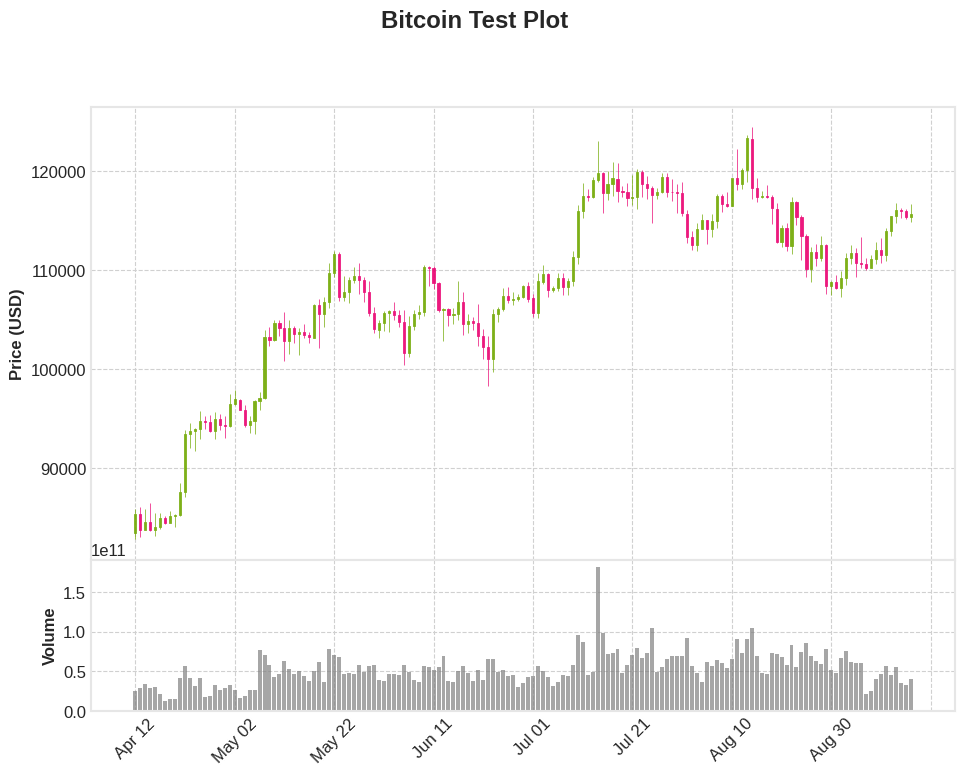

Plot generated successfully.


In [22]:
# Using strings

df_cleaned.Date = pd.to_datetime(df_cleaned.Date)

temp_df = df_cleaned.set_index("Date")

# Correct way - use keyword arguments
plot_candlestick(
    df=temp_df,
    plot_title="Bitcoin Test Plot",
    start_date="2025-04-12",
    end_date="2025-09-15"
)
# Or using datetime objects
